In [ ]:
# Finding fraudulent transactions in Data

In [10]:
# Importing libraries

import pandas as pd
import seaborn as sb
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from datetime import date

In [2]:
# Importing data

df = pd.read_csv('Fraud_Data.csv')
df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 6:03:03,2015-07-09 8:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 3:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 7:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [3]:
df.describe()

,user_id,purchase_value,age,ip_address,is_fraud
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [4]:
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
is_fraud            int64
dtype: object

In [6]:
# checking for missing values

df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
is_fraud          0
dtype: int64

In [ ]:
# So there are no missing values

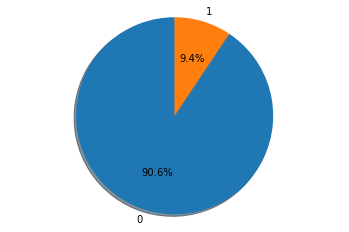

In [9]:
# Descriptive analysis

# Fraud cases out of total population

fraud_val = df.is_fraud.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(fraud_val.values, labels=fraud_val.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# So less than 10 % are values are fraud

In [27]:
# Creating new column

df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['timediff']=(df['purchase_time']-df['signup_time']).astype('timedelta64[m]')
df['timediff'].head(10)

0    75111.0
1      299.0
2        0.0
3     8201.0
4    72691.0
5    70682.0
6    36297.0
7    71145.0
8    59903.0
9    82395.0
Name: timediff, dtype: float64

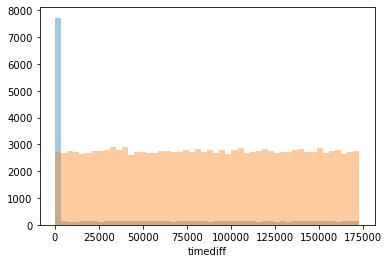

In [32]:
sb.distplot(df[df['is_fraud']==1]['timediff'],bins=50, kde = False)
sb.distplot(df[df['is_fraud']==0]['timediff'],bins=50, kde = False)

In [ ]:
# Clearly, transactions with a small difference between signup time and transaction time are fraud transactions

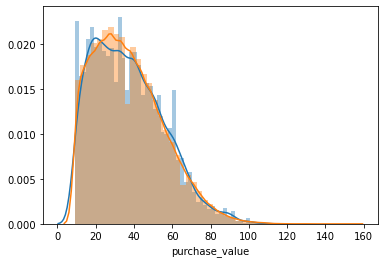

In [33]:
# Lets look at purchase value now

sb.distplot(df[df['is_fraud']==1]['purchase_value'],bins=50)
sb.distplot(df[df['is_fraud']==0]['purchase_value'],bins=50)

In [ ]:
# Purchase value seems to be very similar for both fraud and non-fraud

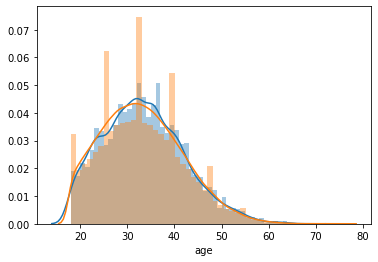

In [36]:
# Lets look at age now

sb.distplot(df[df['is_fraud']==1]['age'],bins=50)
sb.distplot(df[df['is_fraud']==0]['age'],bins=50)

In [ ]:
# Age distribution appears to be similar as well with outliers in non-fraud but not in fraud which is weird